In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [10]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [11]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [12]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 27)           837         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_56 (BatchNo (None, 27)           108         dense_46[0][0]                   
____________________________________________________________________________________

454904/454904 [==============================] - 22s 49us/step - loss: 15.1827 - rec_loss: 24.0703 - kl_loss: 4.6562 - val_loss: 14.2633 - val_rec_loss: 24.8401 - val_kl_loss: 3.0218
Epoch 17/150
454904/454904 [==============================] - 22s 49us/step - loss: 15.1187 - rec_loss: 23.9294 - kl_loss: 4.6730 - val_loss: 13.9582 - val_rec_loss: 24.3041 - val_kl_loss: 2.9546
Epoch 18/150
454904/454904 [==============================] - 22s 49us/step - loss: 15.1438 - rec_loss: 23.9821 - kl_loss: 4.6749 - val_loss: 14.4194 - val_rec_loss: 25.1065 - val_kl_loss: 3.0635
Epoch 19/150
454904/454904 [==============================] - 22s 49us/step - loss: 15.0122 - rec_loss: 23.7298 - kl_loss: 4.6855 - val_loss: 13.5434 - val_rec_loss: 23.3941 - val_kl_loss: 3.0506
Epoch 20/150
454904/454904 [==============================] - 22s 49us/step - loss: 15.0158 - rec_loss: 23.7449 - kl_loss: 4.6892 - val_loss: 13.7706 - val_rec_loss: 23.8323 - val_kl_loss: 3.0682
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 22s 49us/step - loss: 14.7399 - rec_loss: 23.2472 - kl_loss: 4.7498 - val_loss: 13.1294 - val_rec_loss: 22.4449 - val_kl_loss: 3.1870
Epoch 59/150
454904/454904 [==============================] - 22s 49us/step - loss: 14.7757 - rec_loss: 23.2945 - kl_loss: 4.7786 - val_loss: 13.1676 - val_rec_loss: 22.5662 - val_kl_loss: 3.1349
Epoch 60/150
454904/454904 [==============================] - 22s 49us/step - loss: 14.6497 - rec_loss: 23.0712 - kl_loss: 4.7655 - val_loss: 13.1986 - val_rec_loss: 22.6506 - val_kl_loss: 3.1359
Epoch 61/150
454904/454904 [==============================] - 22s 49us/step - loss: 14.7151 - rec_loss: 23.2131 - kl_loss: 4.7719 - val_loss: 13.2927 - val_rec_loss: 22.8791 - val_kl_loss: 3.1095
Epoch 62/150
454904/454904 [==============================] - 22s 49us/step - loss: 14.6023 - rec_loss: 23.0036 - kl_loss: 4.7640 - val_loss: 13.1985 - val_rec_loss: 22.7297 - val_kl_loss: 3.0630
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.3578 - rec_loss: 22.5860 - kl_loss: 4.7788 - val_loss: 13.2079 - val_rec_loss: 22.5096 - val_kl_loss: 3.3095
Epoch 101/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.2854 - rec_loss: 22.4258 - kl_loss: 4.7921 - val_loss: 13.2099 - val_rec_loss: 22.6364 - val_kl_loss: 3.2237
Epoch 102/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.3170 - rec_loss: 22.5048 - kl_loss: 4.7866 - val_loss: 12.9472 - val_rec_loss: 22.0272 - val_kl_loss: 3.3127
Epoch 103/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.2880 - rec_loss: 22.4650 - kl_loss: 4.7716 - val_loss: 12.9588 - val_rec_loss: 22.0611 - val_kl_loss: 3.2816
Epoch 104/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.2994 - rec_loss: 22.4769 - kl_loss: 4.7786 - val_loss: 12.9753 - val_rec_loss: 22.1773 - val_kl_loss: 3.2111
Epoch 105/150
4

454904/454904 [==============================] - 23s 52us/step - loss: 14.2571 - rec_loss: 22.4283 - kl_loss: 4.7898 - val_loss: 13.2567 - val_rec_loss: 22.7449 - val_kl_loss: 3.1885
Epoch 142/150
454904/454904 [==============================] - 23s 52us/step - loss: 14.2668 - rec_loss: 22.4210 - kl_loss: 4.8009 - val_loss: 12.8951 - val_rec_loss: 22.0812 - val_kl_loss: 3.1222
Epoch 143/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.2009 - rec_loss: 22.2949 - kl_loss: 4.7823 - val_loss: 13.2678 - val_rec_loss: 22.7823 - val_kl_loss: 3.1619
Epoch 144/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.2051 - rec_loss: 22.3258 - kl_loss: 4.7687 - val_loss: 13.0755 - val_rec_loss: 22.3673 - val_kl_loss: 3.1925
Epoch 145/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.2078 - rec_loss: 22.3175 - kl_loss: 4.7753 - val_loss: 13.1962 - val_rec_loss: 22.7593 - val_kl_loss: 3.0499
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 86s 190us/step - loss: 0.1700 - accuracy: 0.9388 - val_loss: 0.1081 - val_accuracy: 0.9771
Epoch 43/50
454904/454904 [==============================] - 86s 188us/step - loss: 0.1704 - accuracy: 0.9383 - val_loss: 0.1128 - val_accuracy: 0.9754
Epoch 44/50
454904/454904 [==============================] - 85s 188us/step - loss: 0.1702 - accuracy: 0.9382 - val_loss: 0.1040 - val_accuracy: 0.9764
Epoch 45/50
454904/454904 [==============================] - 83s 183us/step - loss: 0.1702 - accuracy: 0.9383 - val_loss: 0.1021 - val_accuracy: 0.9767
Epoch 46/50
454904/454904 [==============================] - 82s 181us/step - loss: 0.1700 - accuracy: 0.9387 - val_loss: 0.1131 - val_accuracy: 0.9773
Epoch 47/50
454904/454904 [==============================] - 84s 184us/step - loss: 0.1699 - accuracy: 0.9385 - val_loss: 0.1103 - val_accuracy: 0.9753
Epoch 48/50
454904/454904 [==============================] - 86s 188us/step - loss: 0.17

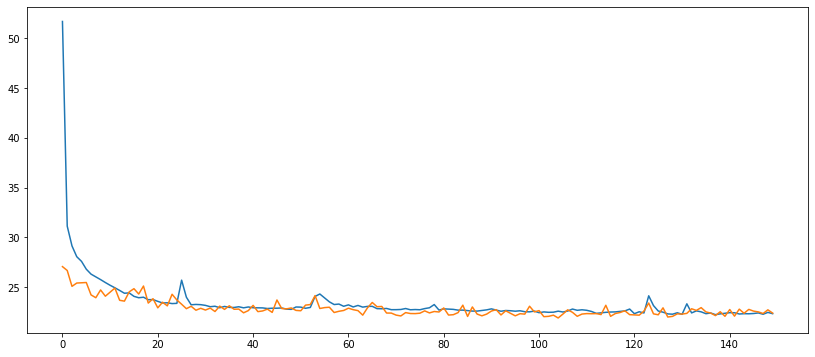

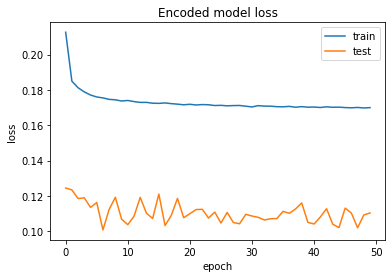

Overall accuracy of Convolutional Neural Network model: 0.975632878059057


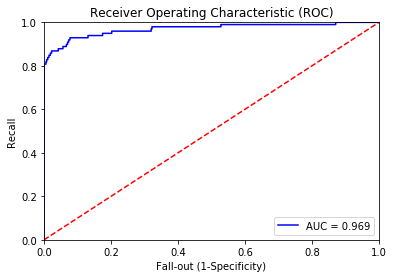

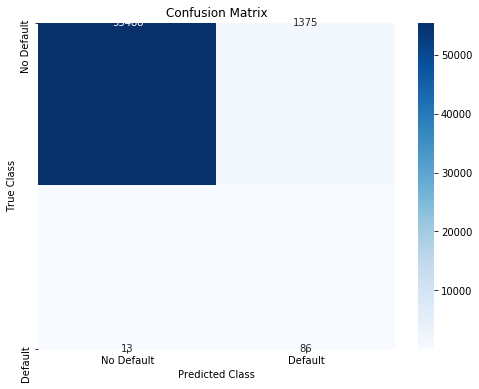

AUC(ROC): 0.9222529713006825
Precision: 0.05886379192334018
Recall: 0.8686868686868687
F1 score: 0.11025641025641027
False positives: 1375
True positives: 86
False negatives: 13
True negatives: 55488
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 27)           837         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 27)           108         dense_55[0][0]                   
____________________________________________________________________________________

454904/454904 [==============================] - 23s 50us/step - loss: 15.1028 - rec_loss: 24.1782 - kl_loss: 4.5188 - val_loss: 13.6662 - val_rec_loss: 23.9654 - val_kl_loss: 2.7639
Epoch 17/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.9429 - rec_loss: 23.8762 - kl_loss: 4.5154 - val_loss: 13.5665 - val_rec_loss: 23.7461 - val_kl_loss: 2.7944
Epoch 18/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.8510 - rec_loss: 23.7034 - kl_loss: 4.5202 - val_loss: 13.3881 - val_rec_loss: 23.4987 - val_kl_loss: 2.6870
Epoch 19/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.8079 - rec_loss: 23.6318 - kl_loss: 4.5171 - val_loss: 13.3092 - val_rec_loss: 23.3176 - val_kl_loss: 2.7287
Epoch 20/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.7955 - rec_loss: 23.6237 - kl_loss: 4.5206 - val_loss: 13.4681 - val_rec_loss: 23.6245 - val_kl_loss: 2.7409
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 23s 50us/step - loss: 18.6410 - rec_loss: 30.5356 - kl_loss: 4.7297 - val_loss: 14.5184 - val_rec_loss: 24.7130 - val_kl_loss: 3.2078
Epoch 59/150
454904/454904 [==============================] - 23s 50us/step - loss: 18.5422 - rec_loss: 30.2867 - kl_loss: 4.7103 - val_loss: 14.5848 - val_rec_loss: 25.2517 - val_kl_loss: 2.8560
Epoch 60/150
454904/454904 [==============================] - 22s 49us/step - loss: 17.9975 - rec_loss: 29.2721 - kl_loss: 4.7147 - val_loss: 14.7797 - val_rec_loss: 25.2227 - val_kl_loss: 3.2656
Epoch 61/150
454904/454904 [==============================] - 22s 49us/step - loss: 17.2653 - rec_loss: 27.8991 - kl_loss: 4.6648 - val_loss: 15.4531 - val_rec_loss: 26.6193 - val_kl_loss: 3.2421
Epoch 62/150
454904/454904 [==============================] - 22s 49us/step - loss: 17.4443 - rec_loss: 28.2714 - kl_loss: 4.6265 - val_loss: 14.2767 - val_rec_loss: 24.3644 - val_kl_loss: 3.1529
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.6532 - rec_loss: 23.0488 - kl_loss: 4.8151 - val_loss: 13.2583 - val_rec_loss: 22.3333 - val_kl_loss: 3.2481
Epoch 101/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.6346 - rec_loss: 23.0138 - kl_loss: 4.8097 - val_loss: 14.1039 - val_rec_loss: 23.9517 - val_kl_loss: 3.3237
Epoch 102/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.5973 - rec_loss: 22.9350 - kl_loss: 4.7885 - val_loss: 13.3757 - val_rec_loss: 22.6963 - val_kl_loss: 3.0991
Epoch 103/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.6854 - rec_loss: 23.1379 - kl_loss: 4.7790 - val_loss: 13.3078 - val_rec_loss: 22.5008 - val_kl_loss: 3.1814
Epoch 104/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.5685 - rec_loss: 22.9721 - kl_loss: 4.7555 - val_loss: 13.4500 - val_rec_loss: 22.6833 - val_kl_loss: 3.2801
Epoch 105/150
4

454904/454904 [==============================] - 23s 50us/step - loss: 14.2124 - rec_loss: 22.4538 - kl_loss: 4.7389 - val_loss: 15.4947 - val_rec_loss: 26.9256 - val_kl_loss: 3.3591
Epoch 142/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.1619 - rec_loss: 22.3576 - kl_loss: 4.7375 - val_loss: 14.0407 - val_rec_loss: 23.9614 - val_kl_loss: 3.4144
Epoch 143/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.1399 - rec_loss: 22.3155 - kl_loss: 4.7410 - val_loss: 13.4254 - val_rec_loss: 22.9184 - val_kl_loss: 3.2305
Epoch 144/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.2101 - rec_loss: 22.4653 - kl_loss: 4.7262 - val_loss: 14.1154 - val_rec_loss: 24.0398 - val_kl_loss: 3.5115
Epoch 145/150
454904/454904 [==============================] - 23s 50us/step - loss: 14.1526 - rec_loss: 22.3667 - kl_loss: 4.7236 - val_loss: 13.3233 - val_rec_loss: 22.6252 - val_kl_loss: 3.3277
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 83s 183us/step - loss: 0.1723 - accuracy: 0.9324 - val_loss: 0.1119 - val_accuracy: 0.9793
Epoch 43/50
454904/454904 [==============================] - 85s 187us/step - loss: 0.1725 - accuracy: 0.9323 - val_loss: 0.1267 - val_accuracy: 0.9775
Epoch 44/50
454904/454904 [==============================] - 87s 190us/step - loss: 0.1717 - accuracy: 0.9321 - val_loss: 0.1176 - val_accuracy: 0.9782
Epoch 45/50
454904/454904 [==============================] - 87s 190us/step - loss: 0.1722 - accuracy: 0.9325 - val_loss: 0.1236 - val_accuracy: 0.9784
Epoch 46/50
454904/454904 [==============================] - 84s 185us/step - loss: 0.1720 - accuracy: 0.9325 - val_loss: 0.1185 - val_accuracy: 0.9796
Epoch 47/50
454904/454904 [==============================] - 83s 184us/step - loss: 0.1724 - accuracy: 0.9323 - val_loss: 0.1232 - val_accuracy: 0.9745
Epoch 48/50
454904/454904 [==============================] - 85s 187us/step - loss: 0.17

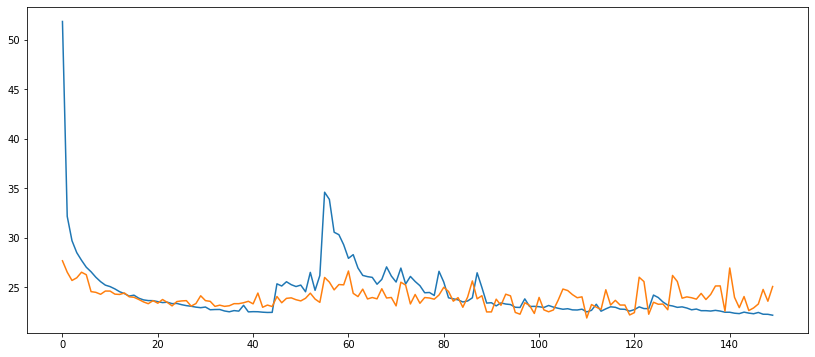

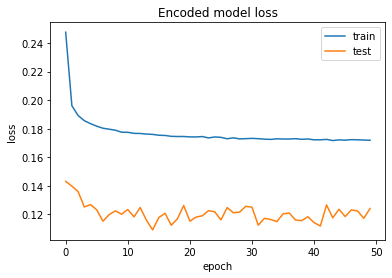

Overall accuracy of Convolutional Neural Network model: 0.9765808784803904


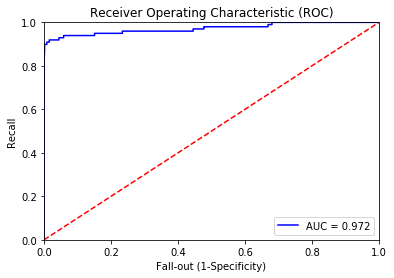

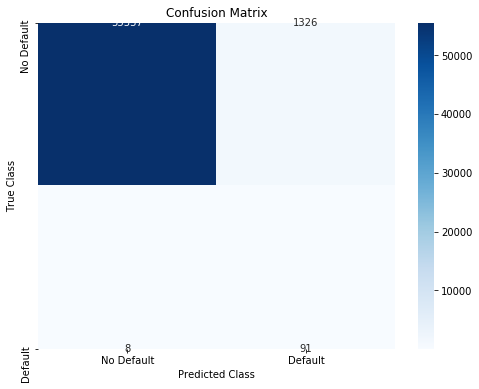

AUC(ROC): 0.9479363566907312
Precision: 0.06422018348623854
Recall: 0.9191919191919192
F1 score: 0.12005277044854883
False positives: 1326
True positives: 91
False negatives: 8
True negatives: 55537
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 27)           837         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 27)           108         dense_64[0][0]                   
____________________________________________________________________________________

454904/454904 [==============================] - 24s 53us/step - loss: 15.1138 - rec_loss: 24.3576 - kl_loss: 4.5272 - val_loss: 13.7504 - val_rec_loss: 23.9131 - val_kl_loss: 3.0494
Epoch 17/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.0758 - rec_loss: 24.2935 - kl_loss: 4.5257 - val_loss: 13.4578 - val_rec_loss: 23.3146 - val_kl_loss: 3.0564
Epoch 18/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.1522 - rec_loss: 24.4523 - kl_loss: 4.5290 - val_loss: 13.4752 - val_rec_loss: 23.4469 - val_kl_loss: 2.9641
Epoch 19/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.9699 - rec_loss: 24.0994 - kl_loss: 4.5319 - val_loss: 13.8297 - val_rec_loss: 24.0136 - val_kl_loss: 3.1197
Epoch 20/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.8482 - rec_loss: 23.8592 - kl_loss: 4.5343 - val_loss: 13.6811 - val_rec_loss: 23.7798 - val_kl_loss: 3.0543
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.1115 - rec_loss: 22.4711 - kl_loss: 4.5874 - val_loss: 13.3120 - val_rec_loss: 22.9642 - val_kl_loss: 3.1249
Epoch 59/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.1174 - rec_loss: 22.4918 - kl_loss: 4.5819 - val_loss: 13.2314 - val_rec_loss: 22.8805 - val_kl_loss: 3.0578
Epoch 60/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.1166 - rec_loss: 22.4868 - kl_loss: 4.5851 - val_loss: 13.4792 - val_rec_loss: 23.3623 - val_kl_loss: 3.0700
Epoch 61/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.0714 - rec_loss: 22.3944 - kl_loss: 4.5849 - val_loss: 13.4783 - val_rec_loss: 23.3781 - val_kl_loss: 3.0386
Epoch 62/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.0574 - rec_loss: 22.3708 - kl_loss: 4.5786 - val_loss: 13.6501 - val_rec_loss: 23.7796 - val_kl_loss: 2.9816
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.8426 - rec_loss: 21.9775 - kl_loss: 4.5856 - val_loss: 13.3707 - val_rec_loss: 23.2403 - val_kl_loss: 2.9816
Epoch 101/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.9137 - rec_loss: 22.1317 - kl_loss: 4.5796 - val_loss: 13.1812 - val_rec_loss: 22.7665 - val_kl_loss: 3.0730
Epoch 102/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.8844 - rec_loss: 22.0794 - kl_loss: 4.5793 - val_loss: 13.3234 - val_rec_loss: 23.1057 - val_kl_loss: 3.0281
Epoch 103/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.8850 - rec_loss: 22.0800 - kl_loss: 4.5829 - val_loss: 13.2881 - val_rec_loss: 22.9791 - val_kl_loss: 3.0757
Epoch 104/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.8296 - rec_loss: 21.9672 - kl_loss: 4.5807 - val_loss: 13.5191 - val_rec_loss: 23.4524 - val_kl_loss: 3.0689
Epoch 105/150
4

454904/454904 [==============================] - 24s 52us/step - loss: 13.8234 - rec_loss: 21.9491 - kl_loss: 4.6004 - val_loss: 13.1857 - val_rec_loss: 22.7942 - val_kl_loss: 3.0533
Epoch 142/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.8562 - rec_loss: 22.0176 - kl_loss: 4.5997 - val_loss: 13.6169 - val_rec_loss: 23.7015 - val_kl_loss: 3.0097
Epoch 143/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.7984 - rec_loss: 21.8898 - kl_loss: 4.6002 - val_loss: 13.4810 - val_rec_loss: 23.3927 - val_kl_loss: 3.0449
Epoch 144/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.8532 - rec_loss: 22.0009 - kl_loss: 4.6008 - val_loss: 13.5885 - val_rec_loss: 23.6289 - val_kl_loss: 3.0067
Epoch 145/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.8310 - rec_loss: 21.9470 - kl_loss: 4.6080 - val_loss: 13.2609 - val_rec_loss: 22.9888 - val_kl_loss: 2.9962
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 87s 191us/step - loss: 0.1869 - accuracy: 0.9311 - val_loss: 0.1216 - val_accuracy: 0.9776
Epoch 43/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.1870 - accuracy: 0.9308 - val_loss: 0.1226 - val_accuracy: 0.9762
Epoch 44/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.1869 - accuracy: 0.9312 - val_loss: 0.1302 - val_accuracy: 0.9733
Epoch 45/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.1867 - accuracy: 0.9309 - val_loss: 0.1305 - val_accuracy: 0.9742
Epoch 46/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.1867 - accuracy: 0.9311 - val_loss: 0.1337 - val_accuracy: 0.9702
Epoch 47/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.1866 - accuracy: 0.9311 - val_loss: 0.1240 - val_accuracy: 0.9729
Epoch 48/50
454904/454904 [==============================] - 87s 191us/step - loss: 0.18

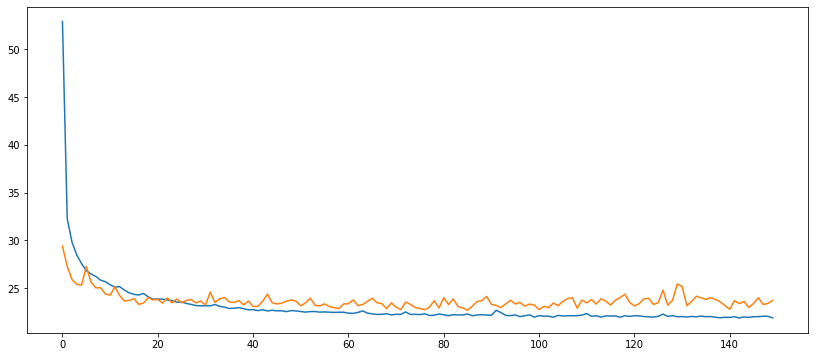

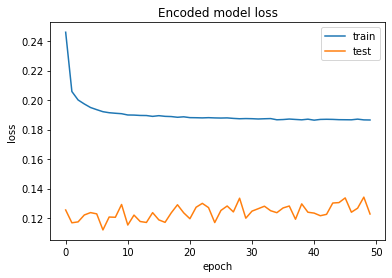

Overall accuracy of Convolutional Neural Network model: 0.9726303962360211


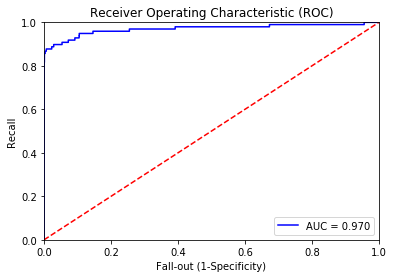

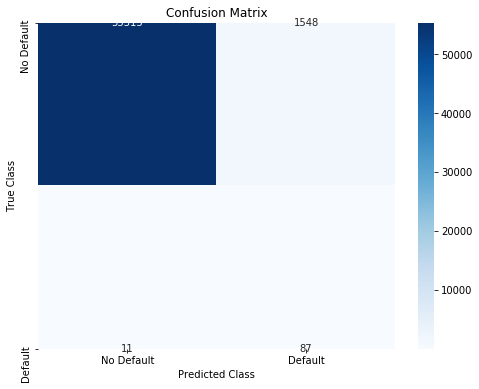

AUC(ROC): 0.9302658879002773
Precision: 0.05321100917431193
Recall: 0.8877551020408163
F1 score: 0.10040392383150608
False positives: 1548
True positives: 87
False negatives: 11
True negatives: 55315
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 27)           837         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_89 (BatchNo (None, 27)           108         dense_73[0][0]                   
____________________________________________________________________________________

454904/454904 [==============================] - 24s 53us/step - loss: 15.7685 - rec_loss: 25.4447 - kl_loss: 4.5177 - val_loss: 13.7824 - val_rec_loss: 24.0331 - val_kl_loss: 2.7713
Epoch 17/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.6486 - rec_loss: 25.2400 - kl_loss: 4.5244 - val_loss: 13.4984 - val_rec_loss: 23.5383 - val_kl_loss: 2.7470
Epoch 18/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.6172 - rec_loss: 25.2228 - kl_loss: 4.5201 - val_loss: 13.8923 - val_rec_loss: 24.3275 - val_kl_loss: 2.7453
Epoch 19/150
454904/454904 [==============================] - 23s 52us/step - loss: 15.5079 - rec_loss: 25.0393 - kl_loss: 4.5162 - val_loss: 13.4833 - val_rec_loss: 23.5953 - val_kl_loss: 2.6811
Epoch 20/150
454904/454904 [==============================] - 23s 51us/step - loss: 15.4895 - rec_loss: 25.0221 - kl_loss: 4.5253 - val_loss: 13.4206 - val_rec_loss: 23.3614 - val_kl_loss: 2.8087
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.2655 - rec_loss: 22.7147 - kl_loss: 4.6250 - val_loss: 13.0110 - val_rec_loss: 22.7063 - val_kl_loss: 2.7980
Epoch 59/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.3090 - rec_loss: 22.8035 - kl_loss: 4.6208 - val_loss: 13.1108 - val_rec_loss: 22.8360 - val_kl_loss: 2.8487
Epoch 60/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.2644 - rec_loss: 22.7057 - kl_loss: 4.6231 - val_loss: 12.9604 - val_rec_loss: 22.5593 - val_kl_loss: 2.8274
Epoch 61/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.2466 - rec_loss: 22.6600 - kl_loss: 4.6299 - val_loss: 13.0311 - val_rec_loss: 22.7379 - val_kl_loss: 2.7944
Epoch 62/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.2305 - rec_loss: 22.6380 - kl_loss: 4.6181 - val_loss: 12.9060 - val_rec_loss: 22.3612 - val_kl_loss: 2.9109
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.1763 - rec_loss: 22.5390 - kl_loss: 4.6308 - val_loss: 12.8122 - val_rec_loss: 22.0806 - val_kl_loss: 2.9899
Epoch 101/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.2162 - rec_loss: 22.6087 - kl_loss: 4.6458 - val_loss: 12.7991 - val_rec_loss: 22.1661 - val_kl_loss: 2.8792
Epoch 102/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.1263 - rec_loss: 22.4356 - kl_loss: 4.6424 - val_loss: 12.6752 - val_rec_loss: 21.8127 - val_kl_loss: 2.9902
Epoch 103/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.1424 - rec_loss: 22.4627 - kl_loss: 4.6381 - val_loss: 12.8591 - val_rec_loss: 22.1525 - val_kl_loss: 3.0086
Epoch 104/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.1783 - rec_loss: 22.5383 - kl_loss: 4.6412 - val_loss: 12.7340 - val_rec_loss: 22.0279 - val_kl_loss: 2.8997
Epoch 105/150
4

454904/454904 [==============================] - 23s 51us/step - loss: 13.9781 - rec_loss: 22.1347 - kl_loss: 4.6687 - val_loss: 12.8801 - val_rec_loss: 22.2682 - val_kl_loss: 2.9602
Epoch 142/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.9914 - rec_loss: 22.1583 - kl_loss: 4.6704 - val_loss: 13.1586 - val_rec_loss: 22.8046 - val_kl_loss: 2.9798
Epoch 143/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.9741 - rec_loss: 22.1264 - kl_loss: 4.6710 - val_loss: 12.7572 - val_rec_loss: 22.0233 - val_kl_loss: 2.9623
Epoch 144/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.9761 - rec_loss: 22.1334 - kl_loss: 4.6691 - val_loss: 12.6976 - val_rec_loss: 21.9454 - val_kl_loss: 2.9264
Epoch 145/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.9159 - rec_loss: 22.0144 - kl_loss: 4.6634 - val_loss: 12.9362 - val_rec_loss: 22.3858 - val_kl_loss: 2.9442
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 87s 192us/step - loss: 0.1735 - accuracy: 0.9334 - val_loss: 0.1114 - val_accuracy: 0.9817
Epoch 43/50
454904/454904 [==============================] - 87s 191us/step - loss: 0.1737 - accuracy: 0.9332 - val_loss: 0.1166 - val_accuracy: 0.9833
Epoch 44/50
454904/454904 [==============================] - 84s 185us/step - loss: 0.1734 - accuracy: 0.9335 - val_loss: 0.1110 - val_accuracy: 0.9832
Epoch 45/50
454904/454904 [==============================] - 84s 184us/step - loss: 0.1739 - accuracy: 0.9333 - val_loss: 0.1180 - val_accuracy: 0.9830
Epoch 46/50
454904/454904 [==============================] - 87s 190us/step - loss: 0.1732 - accuracy: 0.9335 - val_loss: 0.1096 - val_accuracy: 0.9842
Epoch 47/50
454904/454904 [==============================] - 87s 192us/step - loss: 0.1731 - accuracy: 0.9335 - val_loss: 0.1170 - val_accuracy: 0.9819
Epoch 48/50
454904/454904 [==============================] - 87s 192us/step - loss: 0.17

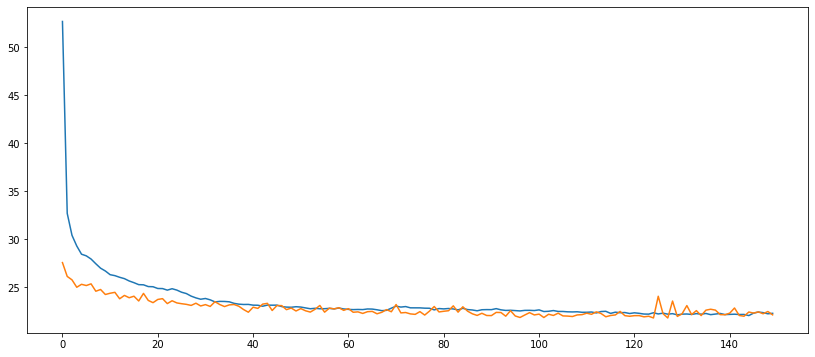

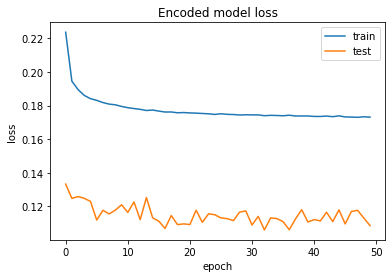

Overall accuracy of Convolutional Neural Network model: 0.9813205526588368


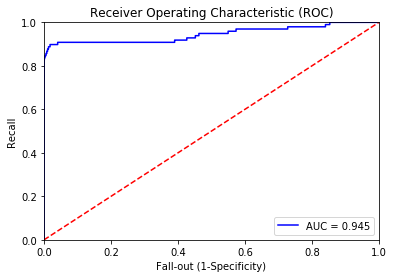

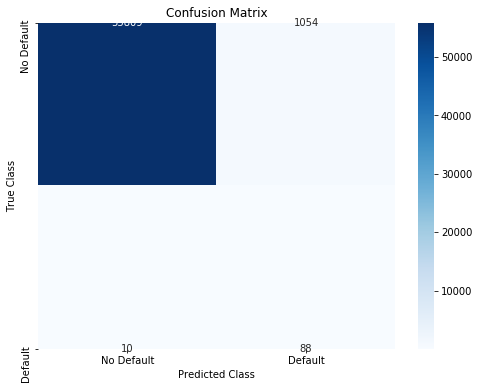

AUC(ROC): 0.9397117023479634
Precision: 0.07705779334500876
Recall: 0.8979591836734694
F1 score: 0.14193548387096777
False positives: 1054
True positives: 88
False negatives: 10
True negatives: 55809
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 27)           837         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 27)           108         dense_82[0][0]                   
____________________________________________________________________________________

454904/454904 [==============================] - 24s 53us/step - loss: 15.4721 - rec_loss: 25.0341 - kl_loss: 4.4448 - val_loss: 13.4166 - val_rec_loss: 23.4939 - val_kl_loss: 2.8053
Epoch 17/150
454904/454904 [==============================] - 24s 53us/step - loss: 16.1473 - rec_loss: 26.3205 - kl_loss: 4.4849 - val_loss: 13.3830 - val_rec_loss: 23.3215 - val_kl_loss: 2.8930
Epoch 18/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.3594 - rec_loss: 24.8232 - kl_loss: 4.4697 - val_loss: 13.3200 - val_rec_loss: 23.1198 - val_kl_loss: 2.9869
Epoch 19/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.2645 - rec_loss: 24.6281 - kl_loss: 4.4861 - val_loss: 13.7511 - val_rec_loss: 24.0517 - val_kl_loss: 2.9143
Epoch 20/150
454904/454904 [==============================] - 24s 53us/step - loss: 15.2320 - rec_loss: 24.5735 - kl_loss: 4.4860 - val_loss: 13.3077 - val_rec_loss: 23.1924 - val_kl_loss: 2.8912
Epoch 21/150
454904/454904 [=====

Epoch 58/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.5148 - rec_loss: 23.1790 - kl_loss: 4.6299 - val_loss: 12.9971 - val_rec_loss: 22.4741 - val_kl_loss: 2.9820
Epoch 59/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.6134 - rec_loss: 23.3781 - kl_loss: 4.6300 - val_loss: 12.7987 - val_rec_loss: 22.1049 - val_kl_loss: 2.9810
Epoch 60/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.5383 - rec_loss: 23.2245 - kl_loss: 4.6344 - val_loss: 12.7736 - val_rec_loss: 21.9610 - val_kl_loss: 3.0457
Epoch 61/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.4440 - rec_loss: 23.0457 - kl_loss: 4.6216 - val_loss: 12.9699 - val_rec_loss: 22.3423 - val_kl_loss: 3.0792
Epoch 62/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.6064 - rec_loss: 23.3566 - kl_loss: 4.6459 - val_loss: 12.8601 - val_rec_loss: 22.1175 - val_kl_loss: 3.0825
Epoch 63/150
454904/

Epoch 100/150
454904/454904 [==============================] - 24s 52us/step - loss: 14.0291 - rec_loss: 22.4762 - kl_loss: 4.5693 - val_loss: 12.7746 - val_rec_loss: 22.0723 - val_kl_loss: 3.0196
Epoch 101/150
454904/454904 [==============================] - 23s 52us/step - loss: 13.9475 - rec_loss: 22.3076 - kl_loss: 4.5809 - val_loss: 12.7900 - val_rec_loss: 22.0969 - val_kl_loss: 3.0461
Epoch 102/150
454904/454904 [==============================] - 23s 51us/step - loss: 13.9127 - rec_loss: 22.2447 - kl_loss: 4.5737 - val_loss: 12.6533 - val_rec_loss: 21.7798 - val_kl_loss: 3.0778
Epoch 103/150
454904/454904 [==============================] - 24s 52us/step - loss: 13.9454 - rec_loss: 22.2989 - kl_loss: 4.5928 - val_loss: 12.6698 - val_rec_loss: 21.8034 - val_kl_loss: 3.0963
Epoch 104/150
454904/454904 [==============================] - 24s 52us/step - loss: 13.9179 - rec_loss: 22.2578 - kl_loss: 4.5848 - val_loss: 12.6434 - val_rec_loss: 21.9371 - val_kl_loss: 2.9003
Epoch 105/150
4

454904/454904 [==============================] - 24s 53us/step - loss: 13.8734 - rec_loss: 22.2226 - kl_loss: 4.5928 - val_loss: 12.6991 - val_rec_loss: 22.0347 - val_kl_loss: 2.9172
Epoch 142/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.8707 - rec_loss: 22.2004 - kl_loss: 4.6030 - val_loss: 12.5724 - val_rec_loss: 21.4912 - val_kl_loss: 3.1929
Epoch 143/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.8435 - rec_loss: 22.1475 - kl_loss: 4.5995 - val_loss: 12.6324 - val_rec_loss: 21.7488 - val_kl_loss: 3.0557
Epoch 144/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.9262 - rec_loss: 22.3089 - kl_loss: 4.6067 - val_loss: 12.5548 - val_rec_loss: 21.6133 - val_kl_loss: 3.0402
Epoch 145/150
454904/454904 [==============================] - 24s 53us/step - loss: 13.9400 - rec_loss: 22.3353 - kl_loss: 4.6081 - val_loss: 12.6658 - val_rec_loss: 21.8203 - val_kl_loss: 3.0574
Epoch 146/150
454904/454904 [

Epoch 42/50
454904/454904 [==============================] - 88s 194us/step - loss: 0.1846 - accuracy: 0.9319 - val_loss: 0.1276 - val_accuracy: 0.9749
Epoch 43/50
454904/454904 [==============================] - 92s 202us/step - loss: 0.1846 - accuracy: 0.9319 - val_loss: 0.1283 - val_accuracy: 0.9749
Epoch 44/50
454904/454904 [==============================] - 96s 211us/step - loss: 0.1849 - accuracy: 0.9315 - val_loss: 0.1248 - val_accuracy: 0.9748
Epoch 45/50
454904/454904 [==============================] - 95s 208us/step - loss: 0.1842 - accuracy: 0.9319 - val_loss: 0.1271 - val_accuracy: 0.9736
Epoch 46/50
454904/454904 [==============================] - 91s 200us/step - loss: 0.1845 - accuracy: 0.9315 - val_loss: 0.1299 - val_accuracy: 0.9721
Epoch 47/50
454904/454904 [==============================] - 85s 187us/step - loss: 0.1842 - accuracy: 0.9319 - val_loss: 0.1257 - val_accuracy: 0.9767
Epoch 48/50
454904/454904 [==============================] - 89s 195us/step - loss: 0.18

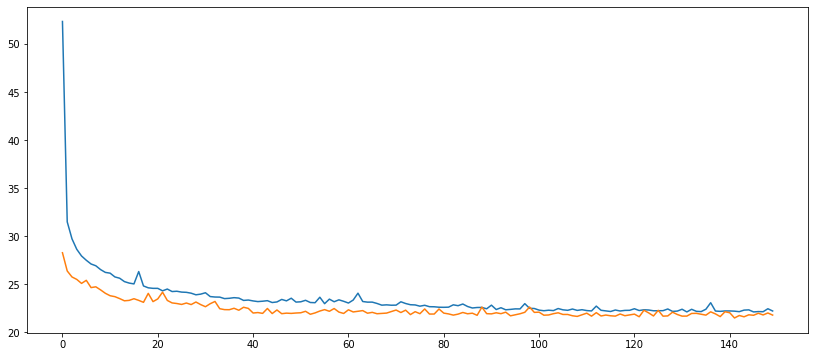

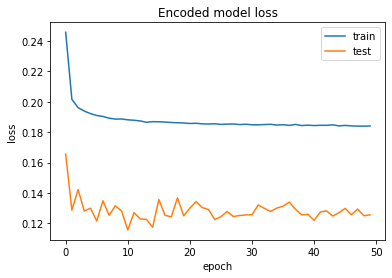

Overall accuracy of Convolutional Neural Network model: 0.9773178139428732


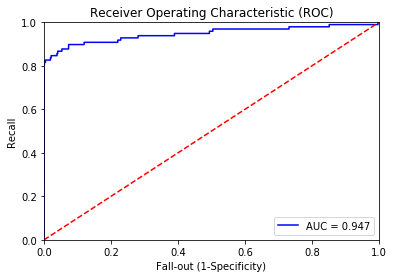

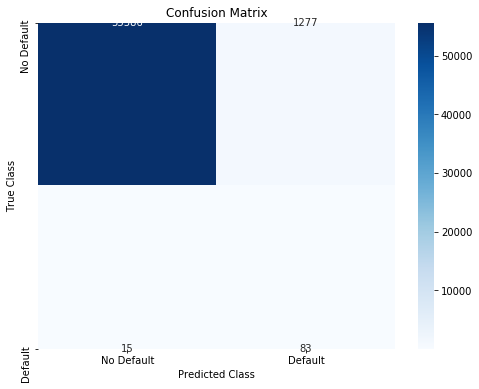

AUC(ROC): 0.9122406449873972
Precision: 0.06102941176470588
Recall: 0.8469387755102041
F1 score: 0.11385459533607681
False positives: 1277
True positives: 83
False negatives: 15
True negatives: 55586


In [14]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [15]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 55547.0
Average fp = 1316.0
Average fn = 11.4
Average tp = 87.0
Average Precision = 6.20%
Average Recall = 88.41%
Average F1 score = 11.59%


In [16]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 277735
Total fp: 6580
 Total fn:57
 Total tp:435
Total Precision = 0.06200997861724875
Total Recall = 0.8841463414634146
Total F1_score = 0.11589183428799787
